In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Youth_Tobacco_Survey__YTS__Data.csv')
df

,YEAR,LocationAbbr,LocationDesc,TopicType,TopicDesc,MeasureDesc,DataSource,Response,Data_Value_Unit,Data_Value_Type,...,GeoLocation,TopicTypeId,TopicId,MeasureId,StratificationID1,StratificationID2,StratificationID3,StratificationID4,SubMeasureID,DisplayOrder
0,2004,OH,Ohio,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.060210141, -82.404260056)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
1,2008,AL,Alabama,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(32.840571122, -86.631860762)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,2EDU,YTS08,8
2,2015,WV,West Virginia,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.665510202, -80.712640135)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
3,2005,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Ever,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,1GEN,8AGE,6RAC,1EDU,YTS08,8
4,2005,CT,Connecticut,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Ever,%,Percentage,...,"(41.56266102, -72.649840952)",BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10595,2002,KS,Kansas,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,"(38.3477403, -98.200781227)",BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
10596,2015,IL,Illinois,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Frequent,%,Percentage,...,"(40.485010283, -88.997710178)",BEH,106BEH,166SSA,2GEN,8AGE,6RAC,2EDU,YTS09,9
10597,2010,WI,Wisconsin,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,"(44.393191174, -89.816370742)",BEH,105BEH,169QUA,3GEN,8AGE,6RAC,1EDU,YTS06,6
10598,2009,LA,Louisiana,Tobacco Use – Survey Data,Cigarette Use (Youth),Smoking Status,YTS,Current,%,Percentage,...,"(31.312660644, -92.445680071)",BEH,106BEH,166SSA,3GEN,8AGE,6RAC,1EDU,YTS07,7


In [3]:
df = df[['YEAR','TopicDesc','LocationDesc',
       'Response', 'Data_Value', 'Data_Value_Std_Err', 'Low_Confidence_Limit',
       'High_Confidence_Limit', 'Sample_Size', 'Gender',
       'Education']]

In [4]:
df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\2706593348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Data_Value': 'Tobacco consumption percentage (%)'}, inplace=True)


In [5]:
df.dropna(subset=['Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit', 
                   'High_Confidence_Limit', 'Sample_Size'], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11924\240540853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Tobacco consumption percentage (%)', 'Data_Value_Std_Err', 'Low_Confidence_Limit',


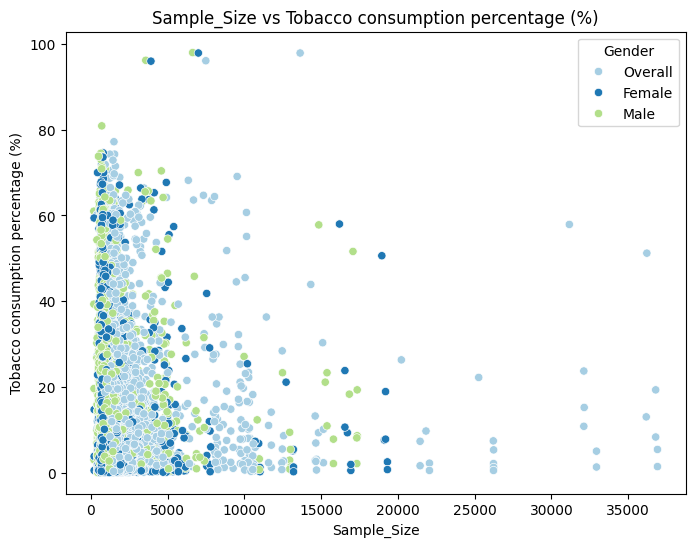

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
filtered_df = df[df['TopicDesc'].isin(["Smokeless Tobacco Use (Youth)", "Cigarette Use (Youth)"])]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_df, x='Sample_Size', y='Tobacco consumption percentage (%)', hue='Gender', palette='Paired')
plt.title('Sample_Size vs Tobacco consumption percentage (%)')
plt.xlabel('Sample_Size')
plt.ylabel('Tobacco consumption percentage (%)')
plt.show()

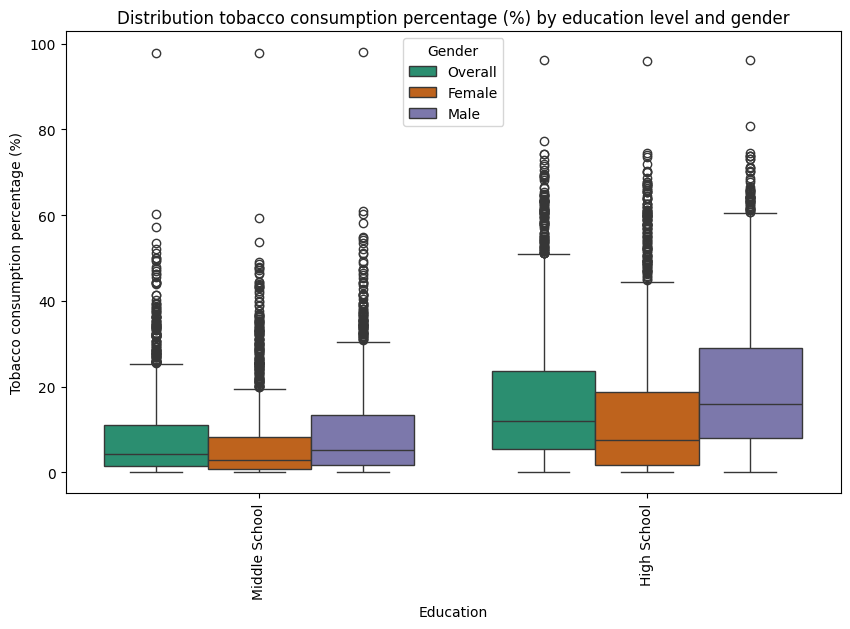

In [7]:
filtered_df = df[df['TopicDesc'].isin(["Smokeless Tobacco Use (Youth)", "Cigarette Use (Youth)"])]
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='Education', y='Tobacco consumption percentage (%)', hue='Gender', palette='Dark2')
plt.xlabel('Education')
plt.ylabel('Tobacco consumption percentage (%)')
plt.title('Distribution tobacco consumption percentage (%) by education level and gender')
plt.xticks(rotation=90)
plt.show()

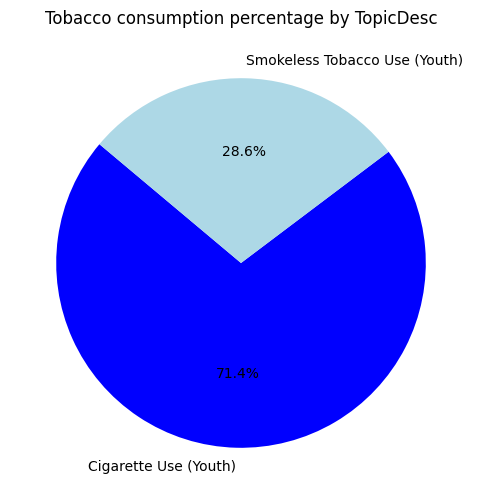

In [8]:
filtered_df = df[df['TopicDesc'].isin(["Smokeless Tobacco Use (Youth)", "Cigarette Use (Youth)"])]

plt.figure(figsize=(6, 6))
filtered_df.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
colors=['blue', 'lightblue'])
plt.title('Tobacco consumption percentage by TopicDesc')
plt.ylabel('')
plt.show()

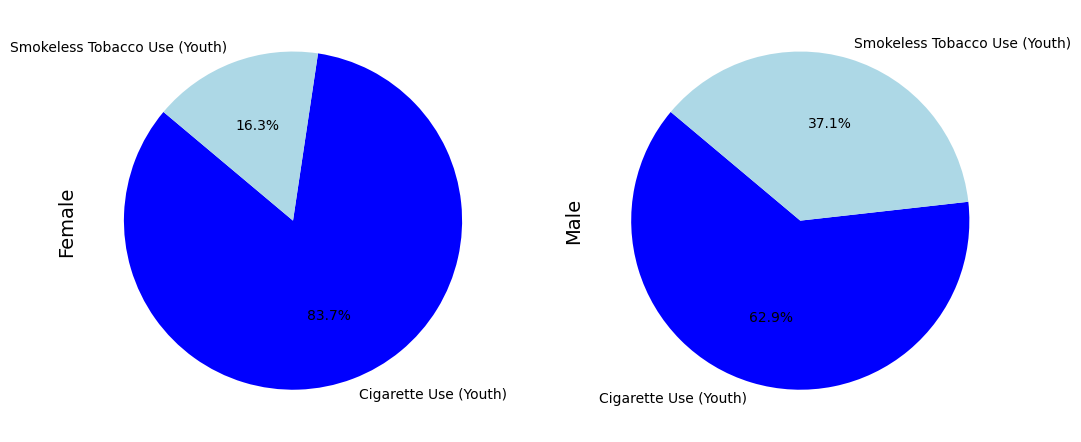

In [9]:
female_data = df[df['Gender'] == 'Female']
male_data = df[df['Gender'] == 'Male']
filtered_female_data = female_data[female_data['TopicDesc'].isin(["Smokeless Tobacco Use (Youth)", "Cigarette Use (Youth)"])]
filtered_male_data = male_data[male_data['TopicDesc'].isin(["Smokeless Tobacco Use (Youth)", "Cigarette Use (Youth)"])]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

filtered_female_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[0], colors=['blue', 'lightblue'])
axes[0].set_ylabel('Female', fontsize=14)

filtered_male_data.groupby('TopicDesc')['Tobacco consumption percentage (%)'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=140, 
                    ax=axes[1], colors=['blue', 'lightblue'])
axes[1].set_ylabel('Male', fontsize=14);

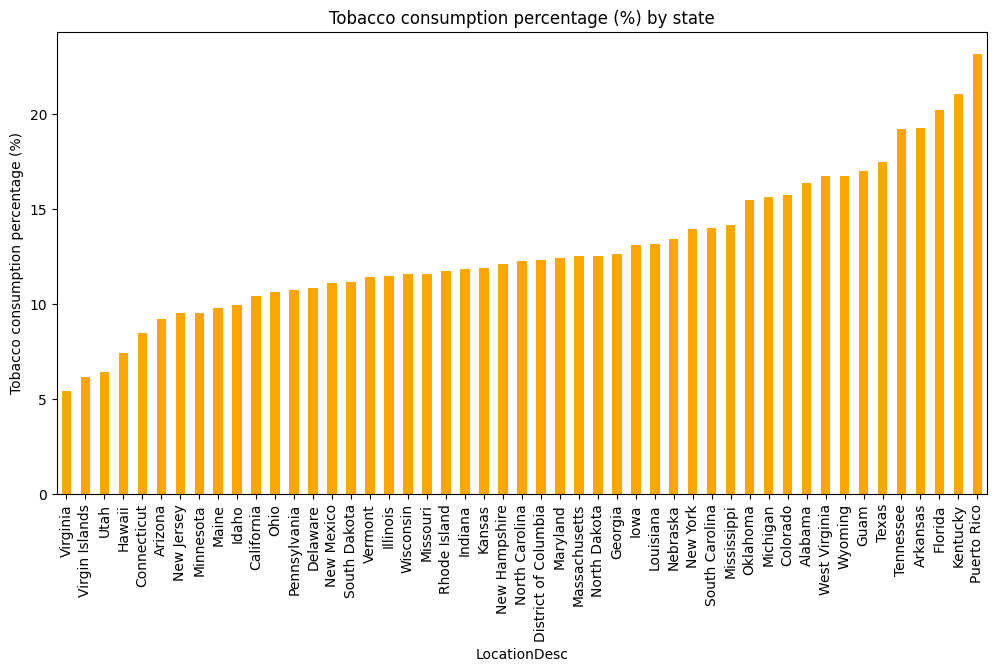

In [10]:
filtered_df = df[df['TopicDesc'].isin(["Cigarette Use (Youth)", "Smokeless Tobacco Use (Youth)"])]
state = filtered_df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=True)
plt.figure(figsize=(12, 6))
state.plot(kind='bar', color='orange')
plt.title('Tobacco consumption percentage (%) by state')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xlabel('LocationDesc')
plt.xticks(rotation=90)
plt.show()

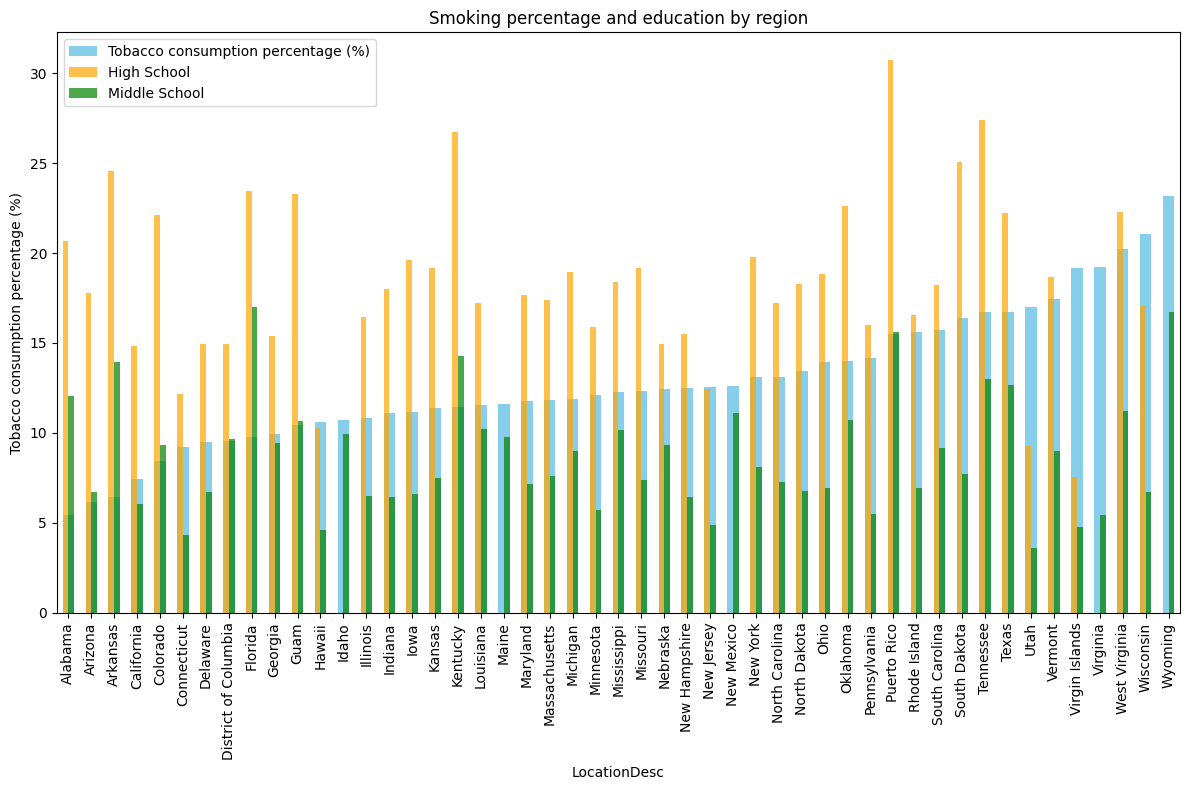

In [11]:
# state = df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=True)
#Trực quan hóa dữ liệu

filtered_df = df[df['TopicDesc'].isin(["Cigarette Use (Youth)", "Smokeless Tobacco Use (Youth)"])]

# Group by 'LocationDesc' và tính giá trị trung bình của 'Tobacco consumption percentage (%)'
state = filtered_df.groupby('LocationDesc')['Tobacco consumption percentage (%)'].mean().sort_values(ascending=True)



education = filtered_df.groupby(['LocationDesc', 'Education'])['Tobacco consumption percentage (%)'].mean().unstack()

plt.figure(figsize=(12, 8))
state.plot(kind='bar', color='skyblue', label='Tobacco consumption percentage (%)')

education.plot(kind='bar', ax=plt.gca(), color=['orange', 'green'], alpha=0.7)

plt.title('Smoking percentage and education by region')
plt.xlabel('LocationDesc')
plt.ylabel('Tobacco consumption percentage (%)')
plt.xticks(rotation=90)
plt.legend(['Tobacco consumption percentage (%)', 'High School', 'Middle School'])
plt.tight_layout()
plt.show()

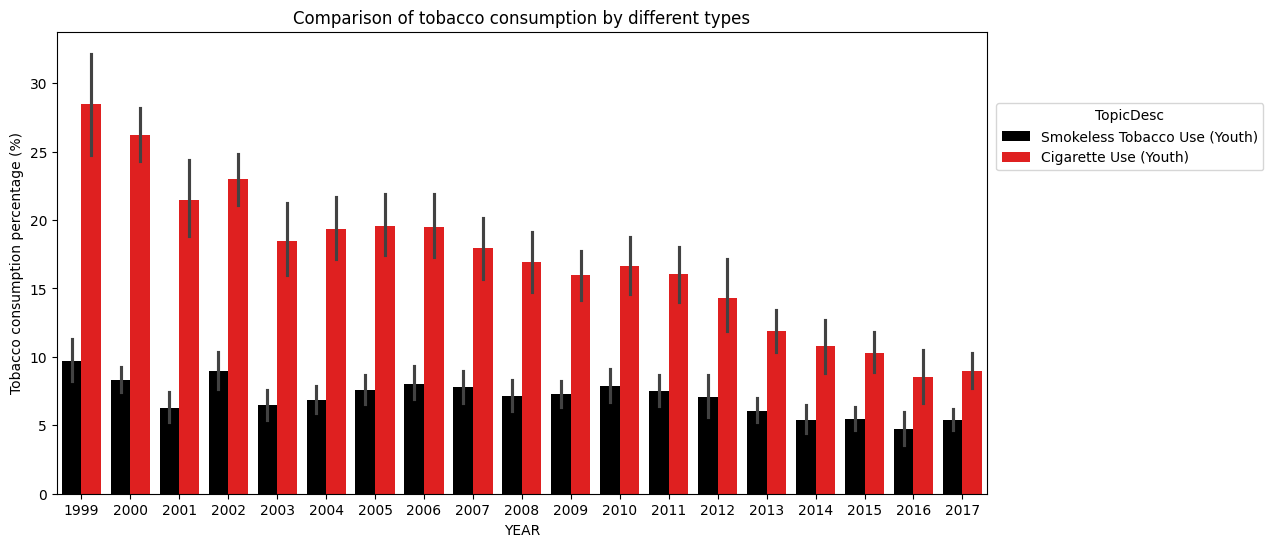

In [12]:
filtered_df = df[df['TopicDesc'].isin(["Smokeless Tobacco Use (Youth)", "Cigarette Use (Youth)"])]
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='YEAR', y='Tobacco consumption percentage (%)', hue='TopicDesc', palette=['black', 'red'])
plt.xlabel('YEAR')
plt.ylabel('Tobacco consumption percentage (%)')
plt.title('Comparison of tobacco consumption by different types')
plt.legend(title='TopicDesc', loc=(1.01, 0.7))
plt.show()

In [13]:
#Thuộc tính phân loại
categorical_features = ['Education', 'Gender', 'Response']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [14]:
categorical_columns = ['Education_Middle School', 'Gender_Male', 'Gender_Overall','Response_Ever', 'Response_Frequent']
df[categorical_columns] = df[categorical_columns].astype(int)

In [15]:
#Split data set
X = df[['Tobacco consumption percentage (%)','Data_Value_Std_Err','Low_Confidence_Limit','High_Confidence_Limit','Sample_Size',
        'Education_Middle School', 'Gender_Male', 'Gender_Overall','Response_Ever', 'Response_Frequent']]

y = df['TopicDesc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
import math
math.sqrt(len(y_test))

44.8998886412873

In [18]:
# Define the model: Init K-NN
model = KNeighborsClassifier(n_neighbors=43, p=2,metric='euclidean')

In [19]:
# Fit Model
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=43)

In [20]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred

array(['Cigarette Use (Youth)', 'Cessation (Youth)',
       'Smokeless Tobacco Use (Youth)', ...,
       'Smokeless Tobacco Use (Youth)', 'Smokeless Tobacco Use (Youth)',
       'Cigarette Use (Youth)'], dtype=object)

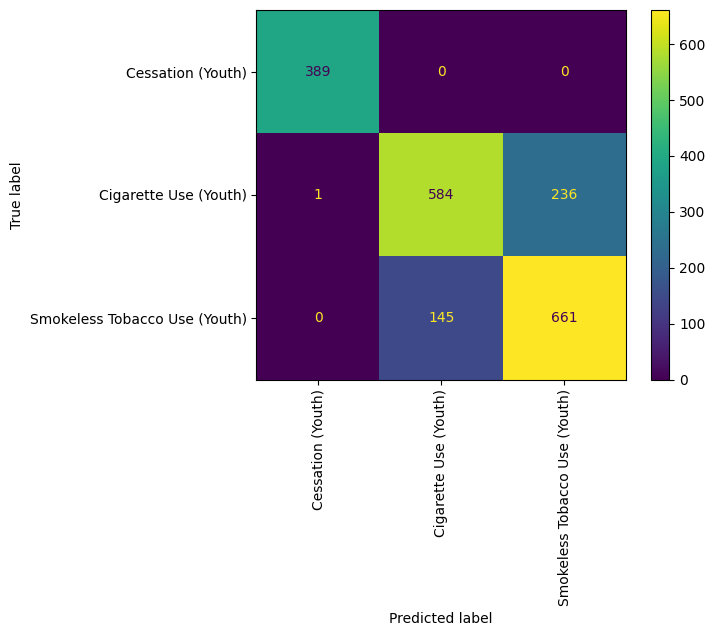

In [21]:
from sklearn import metrics
import matplotlib.pyplot as plt
# Evaluate Model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
index = ['Actual Response ']
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Cessation (Youth)', 'Cigarette Use (Youth)', 'Smokeless Tobacco Use (Youth)'])
cm_display.plot()
plt.xticks(rotation=90)
plt.show()

In [22]:
print(accuracy_score(y_test, y_pred))

0.810515873015873



Feature Importances:
                              Feature  Importance
4                         Sample_Size   -0.001240
7                      Gender_Overall    0.013269
6                         Gender_Male    0.024380
9                   Response_Frequent    0.047445
5             Education_Middle School    0.052654
1                  Data_Value_Std_Err    0.062302
3               High_Confidence_Limit    0.079960
0  Tobacco consumption percentage (%)    0.084077
2                Low_Confidence_Limit    0.090303
8                       Response_Ever    0.148983


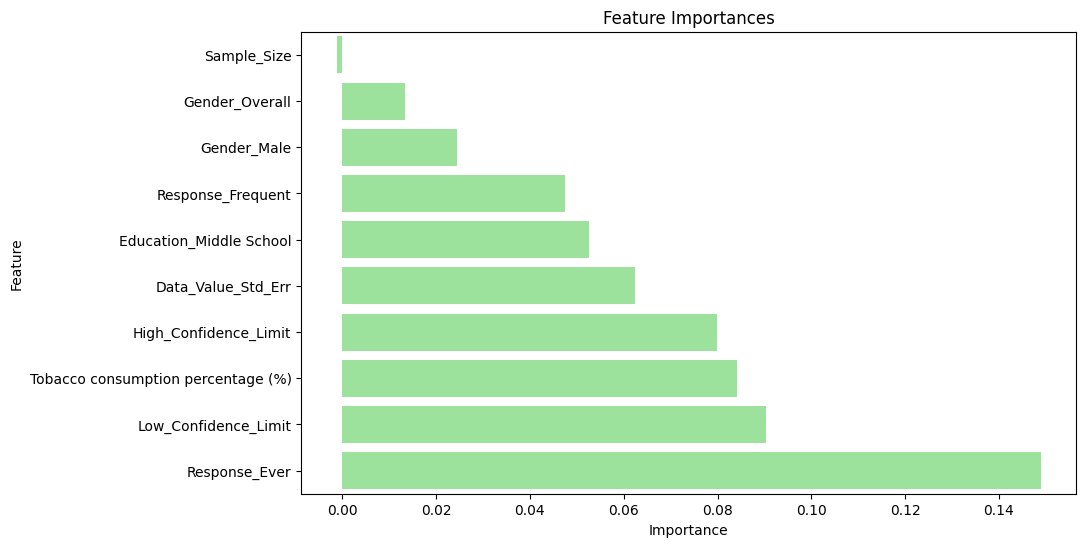

In [23]:
from sklearn.inspection import permutation_importance
import seaborn as sns

result = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=0)

# Tạo DataFrame để biểu diễn tầm quan trọng của các đặc trưng
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})

# Sắp xếp thuộc tính theo mức độ đặc trưng
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# In ra thuộc tính đặc trưng
print('\nFeature Importances:')
print(importance_df)

# Vẽ plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', color='lightgreen')
plt.title('Feature Importances')
plt.show()

In [24]:
#Split data set
X = df[['Response_Ever','Low_Confidence_Limit','Tobacco consumption percentage (%)','High_Confidence_Limit']]

y = df['TopicDesc']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [25]:
#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
import math
math.sqrt(len(y_test))

44.8998886412873

In [27]:
# Define the model: Init K-NN
model = KNeighborsClassifier(n_neighbors=43, p=2,metric='euclidean')

In [28]:
# Fit Model
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=43)

In [29]:
# Predict the test set results
y_pred = model.predict(X_test)
y_pred

array(['Smokeless Tobacco Use (Youth)', 'Cessation (Youth)',
       'Smokeless Tobacco Use (Youth)', ..., 'Cigarette Use (Youth)',
       'Smokeless Tobacco Use (Youth)', 'Cigarette Use (Youth)'],
      dtype=object)

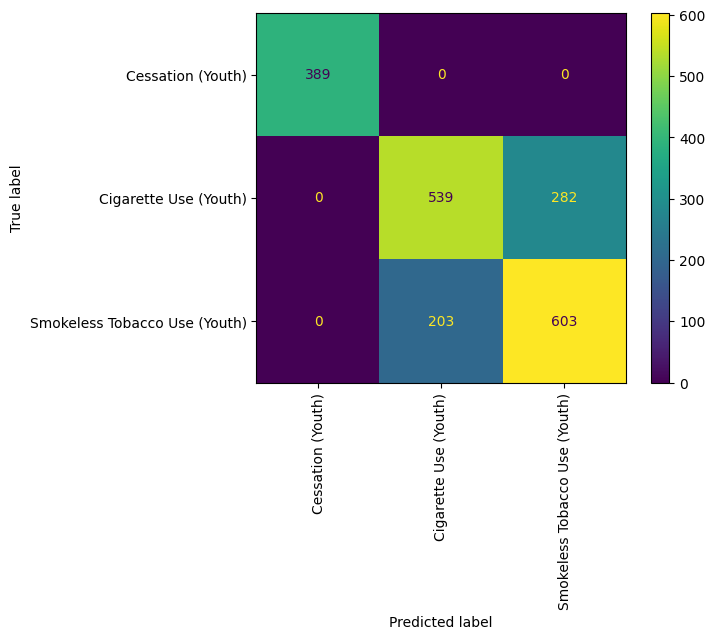

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
# Evaluate Model
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
index = ['Actual Response ']
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Cessation (Youth)', 'Cigarette Use (Youth)', 'Smokeless Tobacco Use (Youth)'])
cm_display.plot()
plt.xticks(rotation=90)
plt.show()

In [31]:
print(accuracy_score(y_test, y_pred))

0.7594246031746031
